# Jurnal Modul 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

Script diatas mengimpor library numpy untuk komputasi numerik, matplotlib.pyplot untuk visualisasi, matplotlib.image untuk manipulasi gambar, dan cv2 (OpenCV) untuk pemrosesan gambar.

## Nomor 1

Script di bawah ini membaca gambar dengan nama file "senheScramble.jpg" menggunakan fungsi img.imread() dari matplotlib.image, dan menyimpannya ke dalam variabel image. Selanjutnya, gambar tersebut ditampilkan menggunakan plt.imshow() dari matplotlib.pyplot dengan menggunakan skema warna "gray" (abu-abu), sehingga menampilkan gambar dalam format abu-abu di plot.

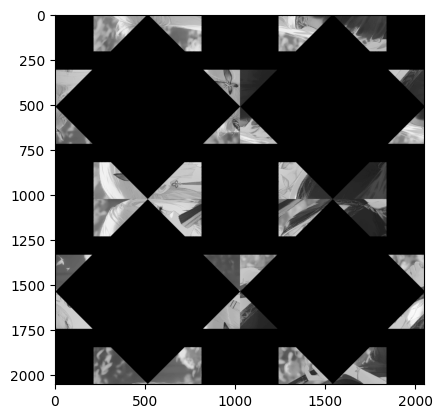

In [2]:
image = img.imread('senheScramble.jpg')
plt.imshow(image, cmap='gray')

Script dibawah ini merupakan fungsi rotasi(image). Fungsi ini menghitung dimensi tinggi dan lebar dari gambar menggunakan image.shape, lalu membuat matriks nol baru dengan ukuran yang dibalik (width, height) dengan tipe data yang sama dengan gambar asli. Selanjutnya, fungsi ini melakukan pengulangan untuk setiap pixel dalam gambar, dan menggeser posisi pixel sesuai dengan transformasi rotasi searah jarum jam 90 derajat. Hasil dari operasi rotasi ini disimpan dalam rotasiImg. Kemudian, gambar hasil rotasi ini ditampilkan menggunakan plt.imshow() dengan skema warna "gray".

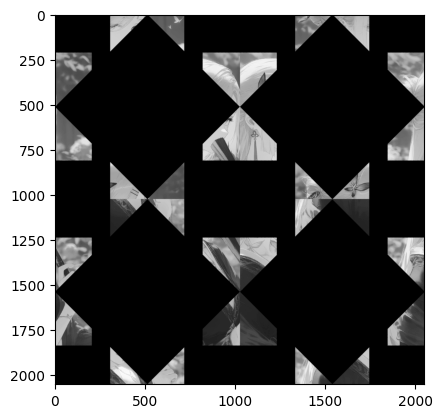

In [3]:
def rotasi(image):
    height, width = image.shape[:2]
    rotasiImg = np.zeros((width, height), dtype=image.dtype)

    for i in range(height):
        for j in range(width):
            x = j
            y = height - i - 1
            
            rotasiImg[x, y] = image[i, j]

    return rotasiImg

rotasiImg = rotasi(image)
plt.imshow(rotasiImg, cmap='gray')

script dibawh ini akan membagi gambar yang telah dirotasi sebelumnya (rotasiImg) menjadi empat bagian yang sama besar. Pertama, tinggi dan lebar dari gambar hasil rotasi dihitung, dan dibagi menjadi dua untuk mendapatkan posisi tengah secara vertikal (perTinggi) dan horizontal (perLebar). Gambar kemudian dibagi menjadi empat bagian yaitu bagian1, bagian2, bagian3, dan bagian4. Keempat bagian ini kemudian ditampilkan dalam empat subplot berbeda menggunakan plt.subplot(),sehingga ditampilkan masing-masing bagian dari gambar hasil rotasi.

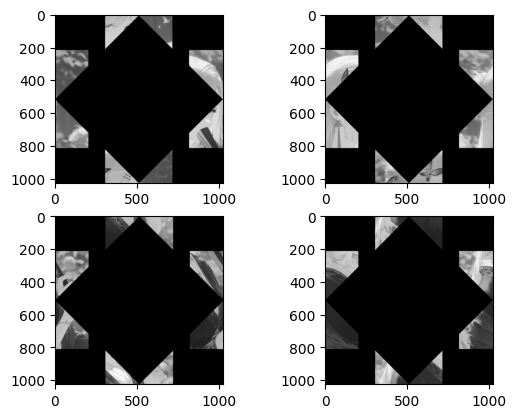

In [4]:
tinggi, lebar = rotasiImg.shape[:2]
perTinggi = tinggi // 2
perLebar = lebar // 2

bagian1 = rotasiImg[:perTinggi, :perLebar]
bagian2 = rotasiImg[:perTinggi, perLebar:]
bagian3 = rotasiImg[perTinggi:, :perLebar]
bagian4 = rotasiImg[perTinggi:, perLebar:]

plt.subplot(221)
plt.imshow(bagian1, cmap='gray')
plt.subplot(222)
plt.imshow(bagian2, cmap='gray')
plt.subplot(223)
plt.imshow(bagian3, cmap='gray')
plt.subplot(224)
plt.imshow(bagian4, cmap='gray')
plt.show()

In [5]:
def cari(img,x1=0,x2=0,y1=0,y2=0):
    hasil = np.zeros((x2-x1,y2-y1)).astype(int)
    for i in range(x1,x2):
        for j in range(y1,y2):
            hasil[i-x1,j-y1] = img[i,j]
    return hasil

Script diatas merupakan fungsi cari(img, x1=0, x2=0, y1=0, y2=0) yang digunakan untuk mengambil sebuah gambar img dan empat parameter yaitu x1, x2, y1, y2. Fungsi ini membuat sebuah matriks nol baru (hasil) dengan ukuran (x2-x1, y2-y1) menggunakan np.zeros() dan mengkonversi tipe datanya menjadi int. Selanjutnya, fungsi ini melakukan pengulangan untuk setiap pixel dalam rentang (x1, x2) dan (y1, y2) dari gambar asli, dan menyalin nilai pixel tersebut ke dalam matriks hasil pada posisi yang sesuai (i-x1, j-y1). Hasilnya adalah potongan gambar yang diambil dari gambar asli, sesuai dengan rentang yang ditentukan oleh parameter x1, x2, y1, dan y2. Potongan gambar ini kemudian dikembalikan sebagai hasil dari fungsi.

In [6]:
def transalasi(img, x=0, y=0):
    tinggi, lebar = img.shape
    hasil = np.zeros((tinggi,lebar))
    for i in range(tinggi):
        for j in range(lebar):
            x2 = i-x
            y2 = j-y
            if(y2<0):
                y2 = lebar + y2
            if(x2<0):
                x2 = lebar + x2
            if 0<=x2<tinggi and 0<=y2<tinggi:
                hasil[i,j] = img[x2, y2]
    return hasil

Script diatas merupakan fungsi transalasi(img, x=0, y=0) yang digunakan untuk melakukan translasi gambar img sejauh x piksel ke arah horizontal dan y piksel ke arah vertikal. Setiap pixel dipindahkan sesuai dengan jumlah yang ditentukan, dan posisi baru pixel dihitung. Jika pixel bergerak ke luar batas gambar, fungsi akan memindahkan pixel ke sisi yang sesuai. Hasilnya adalah gambar yang telah dipindahkan sesuai translasi yang ditentukan, yang kemudian dikembalikan sebagai output fungsi.

In [7]:
def hapusPadd(img,px=0):
    barisImg = np.any(img > px, axis=1)
    colomImg = np.any(img > px, axis=0)
    return img[barisImg][:, colomImg]

Script diatas merupakan fungsi hapusPadd(img, px=0) digunakn untuk menghapus "padding" atau bagian kosong dengan nilai piksel di bawah px dari gambar img. Dengan membuat dua array boolean yang menunjukkan baris dan kolom mana yang memiliki setidaknya satu nilai piksel di atas px, fungsi ini membuang bagian yang tidak diinginkan dari gambar. Hasilnya adalah potongan gambar yang lebih fokus pada bagian utama yang memiliki nilai piksel di atas px.

In [8]:
def imgGabung(hasil,potongan,x1=0,x2=0,y1=0,y2=0):
    for i in range(x1,x2):
        for j in range(y1,y2):
            if(potongan[i-x1,j-y1]>10):
                hasil[i,j] = potongan[i-x1,j-y1]
    return hasil

Script diatas merupakan fungsi imgGabung(hasil, potongan, x1=0, x2=0, y1=0, y2=0) yang digunakan untuk menggabungkan gambar, di mana potongan akan ditambahkan ke dalam hasil jika nilai piksel pada potongan di atas 10 pada posisi yang sesuai dengan x1, x2, y1, dan y2. Proses penggabungan dilakukan dengan perulangan melalui setiap pixel dalam rentang yang ditentukan, dan jika nilai piksel potongan pada posisi tersebut lebih dari 10, nilai piksel tersebut akan disalin ke dalam hasil. Hasil akhir dari proses ini adalah gabungan gambar dari hasil dengan bagian yang dipilih dari potongan gambar.

Script dibawah ini proses untuk menampilkan hasil translasi bagian 1 dengan menggeser gambar sejauh 215 piksel ke kanan dan 210 piksel ke bawah

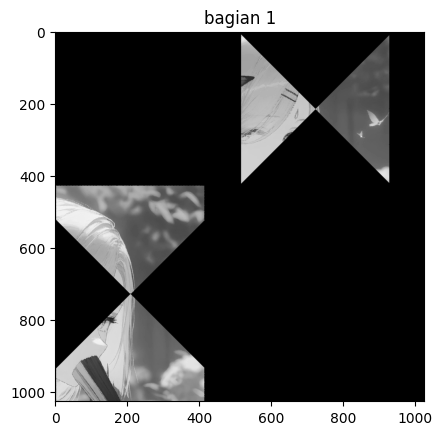

In [9]:
bagian1 = transalasi(bagian1, x = 215, y = 210)
plt.title("bagian 1")
plt.imshow(bagian1,cmap="gray")

Script di bawah terdapat fungsi cari(bagian1, x2=425, y1=500, y2=950) untuk mendapatkan potongan gambar bagian1 dari baris 500 hingga 950 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian1a. Selanjutnya, variabel bagian1a diproses dengan fungsi hapusPadd(bagian1a, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian1a yang telah dipotong dan dibersihkan akan ditampilkan.

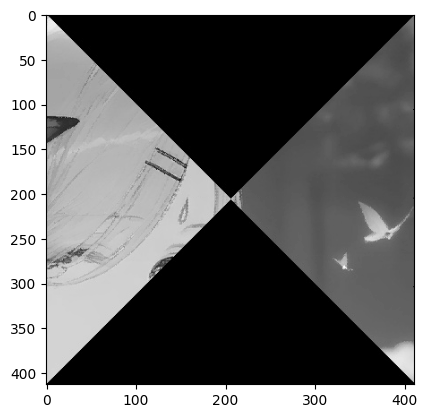

In [10]:
bagian1a = cari(bagian1,x2=425,y1=500,y2=950)
bagian1a=hapusPadd(bagian1a,px=10)
plt.imshow(bagian1a,cmap="gray")

Script di bawah terdapat fungsi cari(bagian1,x1=420,x2=1025,y2=425) untuk mendapatkan potongan gambar bagian1 dari baris 420 hingga 1025 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian1b. Selanjutnya, variabel bagian1b diproses dengan fungsi hapusPadd(bagian1b, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian1b yang telah dipotong dan dibersihkan akan ditampilkan.

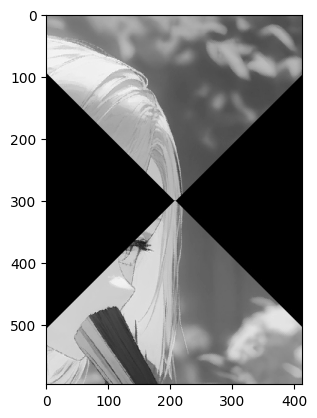

In [11]:
bagian1b = cari(bagian1,x1=420,x2=1025,y2=425)
bagian1b=hapusPadd(bagian1b,px=10)
plt.imshow(bagian1b,cmap="gray")

script dibawh ini untuk menggabungkan gambar yaitu bagian1b dan bagian1a, dengan fungsi imgGabung() dalam rentang piksel yang ditentukan. Proses ini memasukkan nilai piksel dari bagian1a ke bagian1b jika nilainya lebih dari 10, yang kemudian disimpan dalam variabel gabung1. Hasil gabungan ini kemudian ditampilkan dalam plot dan ditampilkan potongan gambar yang merupakan hasil penggabungan dari bagian1b dengan bagian1a.

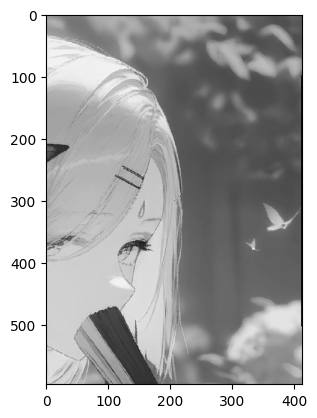

In [12]:
gabung1 = imgGabung(bagian1b,bagian1a,x1=95,x2=507,y2=410)
plt.imshow(gabung1,cmap="gray")

Script dibawah ini proses untuk menampilkan hasil translasi bagian 2 dengan menggeser gambar sejauh 215 piksel ke kanan dan 210 piksel ke bawah

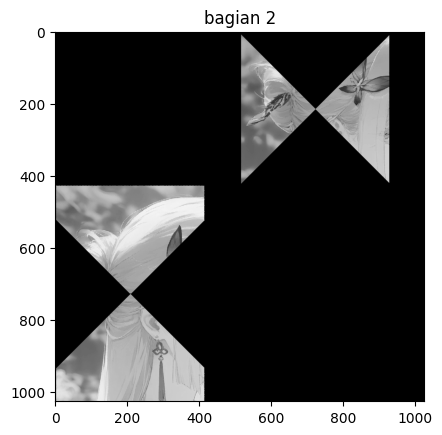

In [13]:
bagian2 = transalasi(bagian2, x = 215, y = 210)
plt.title("bagian 2")
plt.imshow(bagian2,cmap="gray")

Script di bawah terdapat fungsi cari(bagian2, x2=425, y1=500, y2=950) untuk mendapatkan potongan gambar bagian2 dari baris 500 hingga 950 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian2a. Selanjutnya, variabel bagian2a diproses dengan fungsi hapusPadd(bagian2a, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian2a yang telah dipotong dan dibersihkan akan ditampilkan.

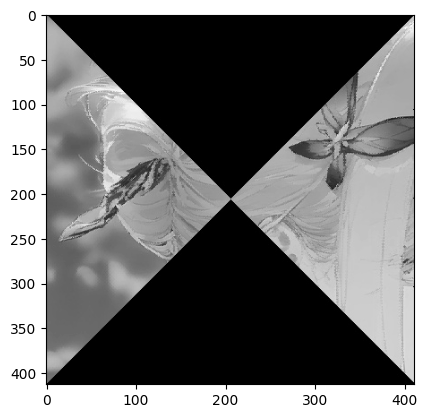

In [14]:
bagian2a = cari(bagian2,x2=425,y1=500,y2=950)
bagian2a=hapusPadd(bagian2a,px=10)
plt.imshow(bagian2a,cmap="gray")

Script di bawah terdapat fungsi cari(bagian2,x1=420,x2=1025,y2=425) untuk mendapatkan potongan gambar bagian2 dari baris 420 hingga 1025 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian2b. Selanjutnya, variabel bagian2b diproses dengan fungsi hapusPadd(bagian2b, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian2b yang telah dipotong dan dibersihkan akan ditampilkan.

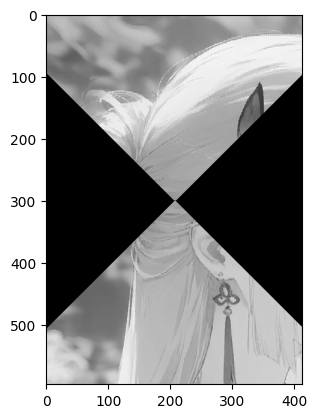

In [15]:
bagian2b = cari(bagian2,x1=420,x2=1025,y2=425)
bagian2b=hapusPadd(bagian2b,px=10)
plt.imshow(bagian2b,cmap="gray")

script dibawh ini untuk menggabungkan gambar yaitu bagian2b dan bagian2a, dengan fungsi imgGabung() dalam rentang piksel yang ditentukan. Proses ini memasukkan nilai piksel dari bagian2a ke bagian2b jika nilainya lebih dari 10, yang kemudian disimpan dalam variabel gabung1. Hasil gabungan ini kemudian ditampilkan dalam plot dan ditampilkan potongan gambar yang merupakan hasil penggabungan dari bagian2b dengan bagian2a.

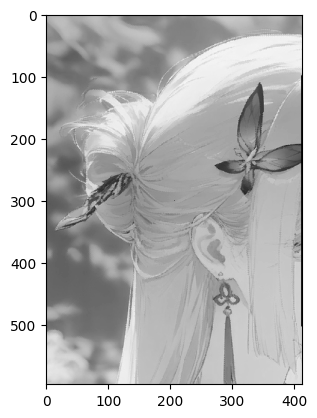

In [16]:
gabung2 = imgGabung(bagian2b,bagian2a,x1=95,x2=507,y2=410)
plt.imshow(gabung2,cmap="gray")

Script dibawah ini proses untuk menampilkan hasil translasi bagian 3 dengan menggeser gambar sejauh 215 piksel ke kanan dan 210 piksel ke bawah

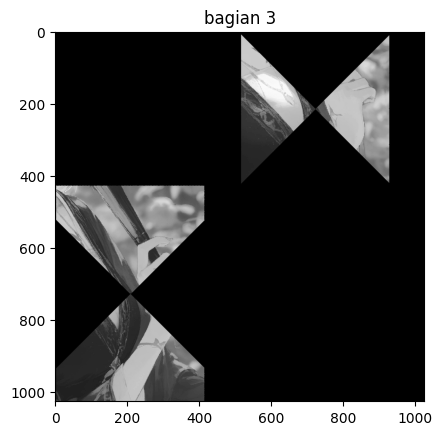

In [17]:
bagian3 = transalasi(bagian3, x = 215, y = 210)
plt.title("bagian 3")
plt.imshow(bagian3,cmap="gray")

Script di bawah terdapat fungsi cari(bagian3, x2=425, y1=500, y2=950) untuk mendapatkan potongan gambar bagian3 dari baris 500 hingga 950 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian3a. Selanjutnya, variabel bagian3a diproses dengan fungsi hapusPadd(bagian3a, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian3a yang telah dipotong dan dibersihkan akan ditampilkan.

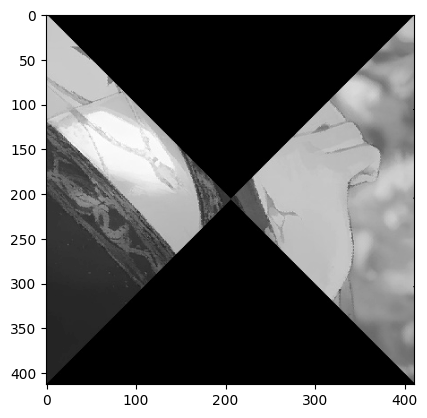

In [18]:
bagian3a = cari(bagian3,x2=425,y1=500,y2=950)
bagian3a=hapusPadd(bagian3a,px=10)
plt.imshow(bagian3a,cmap="gray")

Script di bawah terdapat fungsi cari(bagian3,x1=420,x2=1025,y2=425) untuk mendapatkan potongan gambar bagian3 dari baris 420 hingga 1025 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian3b. Selanjutnya, variabel bagian3b diproses dengan fungsi hapusPadd(bagian3b, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian3b yang telah dipotong dan dibersihkan akan ditampilkan.

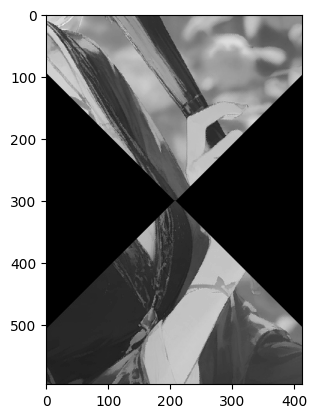

In [19]:
bagian3b = cari(bagian3,x1=420,x2=1025,y2=425)
bagian3b=hapusPadd(bagian3b,px=10)
plt.imshow(bagian3b,cmap="gray")

script dibawh ini untuk menggabungkan gambar yaitu bagian3b dan bagian3a, dengan fungsi imgGabung() dalam rentang piksel yang ditentukan. Proses ini memasukkan nilai piksel dari bagian3a ke bagian3b jika nilainya lebih dari 10, yang kemudian disimpan dalam variabel gabung1. Hasil gabungan ini kemudian ditampilkan dalam plot dan ditampilkan potongan gambar yang merupakan hasil penggabungan dari bagian3b dengan bagian3a.

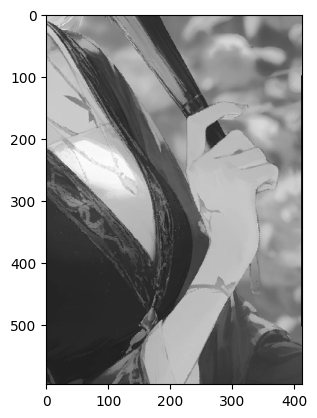

In [20]:
gabung3 = imgGabung(bagian3b,bagian3a,x1=95,x2=507,y2=410)
plt.imshow(gabung3,cmap="gray")

Script dibawah ini proses untuk menampilkan hasil translasi bagian 4 dengan menggeser gambar sejauh 215 piksel ke kanan dan 210 piksel ke bawah

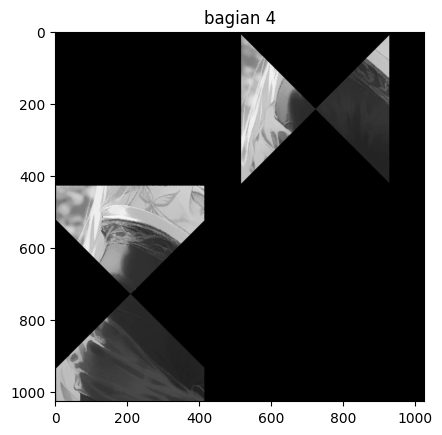

In [21]:
bagian4 = transalasi(bagian4, x = 215, y = 210)
plt.title("bagian 4")
plt.imshow(bagian4,cmap="gray")

Script di bawah terdapat fungsi cari(bagian4, x2=425, y1=500, y2=950) untuk mendapatkan potongan gambar bagian4 dari baris 500 hingga 950 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian4a. Selanjutnya, variabel bagian4a diproses dengan fungsi hapusPadd(bagian4a, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian4a yang telah dipotong dan dibersihkan akan ditampilkan.

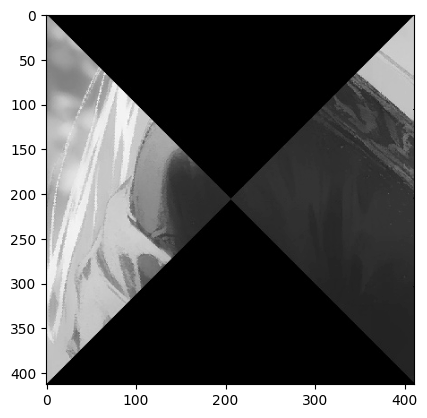

In [22]:
bagian4a = cari(bagian4,x2=425,y1=500,y2=950)
bagian4a=hapusPadd(bagian4a,px=10)
plt.imshow(bagian4a,cmap="gray")

Script di bawah terdapat fungsi cari(bagian4,x1=420,x2=1025,y2=425) untuk mendapatkan potongan gambar bagian4 dari baris 420 hingga 1025 dan kolom 0 hingga 425. Potongan gambar ini kemudian disimpan ke dalam variabel bagian4b. Selanjutnya, variabel bagian4b diproses dengan fungsi hapusPadd(bagian4b, px=10) untuk menghilangkan "padding" atau bagian kosong dengan nilai piksel di bawah 10. Hasilnya adalah gambar bagian4b yang telah dipotong dan dibersihkan akan ditampilkan.

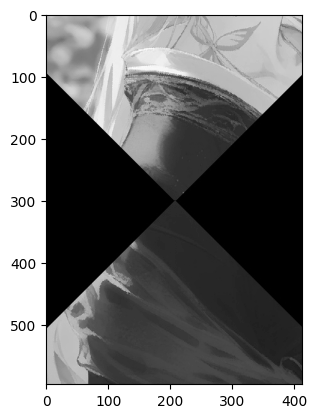

In [23]:
bagian4b = cari(bagian4,x1=420,x2=1025,y2=425)
bagian4b=hapusPadd(bagian4b,px=10)
plt.imshow(bagian4b,cmap="gray")

script dibawh ini untuk menggabungkan gambar yaitu bagian4b dan bagian4a, dengan fungsi imgGabung() dalam rentang piksel yang ditentukan. Proses ini memasukkan nilai piksel dari bagian4a ke bagian4b jika nilainya lebih dari 10, yang kemudian disimpan dalam variabel gabung1. Hasil gabungan ini kemudian ditampilkan dalam plot dan ditampilkan potongan gambar yang merupakan hasil penggabungan dari bagian4b dengan bagian4a.

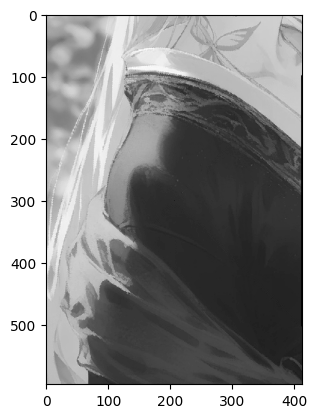

In [24]:
gabung4 = imgGabung(bagian4b,bagian4a,x1=95,x2=507,y2=410)
plt.imshow(gabung4,cmap="gray")

Script dibawah ini terdapat gabungFix dengan ukuran (1188, 820). Kemudian, fungsi imgGabung() dipanggil empat kali untuk menggabungkan gambar-gambar gabung2, gabung1, gabung4, dan gabung3 ke dalam gabungFix dalam rentang piksel yang ditentukan. Hasilnya adalah gambar gabungFix yang merupakan gabungan dari keempat gambar tersebut, dan kemudian ditampilkan dalam plot.

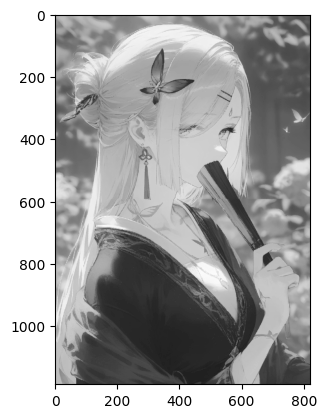

In [25]:
gabungFix = np.zeros((1188,820))
gabungFix = imgGabung(gabungFix,gabung2,x2=594,y2=410)
gabungFix = imgGabung(gabungFix,gabung1,x2=594,y1=409,y2=820)
gabungFix = imgGabung(gabungFix,gabung4,x1=593,x2=1188,y2=410)
gabungFix = imgGabung(gabungFix,gabung3,x1=593,x2=1188,y1=409,y2=820)
plt.imshow(gabungFix,cmap="gray")

## Nomor 2

In [26]:
def nilaiMuncul(img,skala=256):
    pixel = np.zeros(skala)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel[int(img[i,j])] =  pixel[int(img[i,j])] + 1
    return pixel

Script diatas ini merupakan fungsi nilaiMuncul digunakan untuk menghitung frekuensi kemunculan nilai pixel dalam gambar grayscale. Pertama-tama, fungsi ini membuat array pixel berukuran skala (256 secara default) yang berisi nilai nol untuk menyimpan jumlah kemunculan setiap nilai pixel. Selanjutnya, dilakukan perulangan untuk setiap pixel dalam gambar (img), di mana nilai pixel tersebut akan diambil dan dijadikan indeks untuk array pixel. Setiap kali nilai pixel yang sama ditemukan, nilai di array pixel pada indeks yang sesuai akan ditambah satu. Akhirnya, fungsi ini mengembalikan array pixel yang berisi jumlah kemunculan setiap nilai pixel dalam gambar grayscale.

In [27]:
def probabilitas(img, pixel,skala=256):
    for i in range(skala):
        pixel[i] = pixel [i] / (img.shape[0] * img.shape[1])
    return pixel

Script diatas merupakan fungsi probabilitas digunakan untuk menghitung probabilitas kemunculan setiap nilai pixel dalam gambar grayscale. Pada awalnya, fungsi ini menerima parameter img yang merupakan gambar grayscale, pixel yang merupakan array yang berisi jumlah kemunculan setiap nilai pixel (hasil dari fungsi nilaiMuncul sebelumnya), dan skala yang merupakan jumlah total nilai pixel (256 secara default untuk gambar grayscale). Selanjutnya, dilakukan perulangan untuk setiap nilai pixel mulai dari 0 hingga skala-1. Di dalam perulangan, setiap nilai pixel[i] (jumlah kemunculan nilai pixel ke-i) dibagi dengan total jumlah pixel dalam gambar (img.shape[0] * img.shape[1]) untuk mendapatkan probabilitas kemunculan nilai pixel tersebut. Hasil probabilitas kemudian disimpan kembali ke dalam array pixel. Akhirnya, fungsi mengembalikan array pixel yang sekarang berisi probabilitas kemunculan setiap nilai pixel dalam gambar.

In [28]:
def kumulatif(arr,skala=256):
    for i in range(skala):
        if i != 0:
            arr[i] = arr[i] + arr[i-1]
    return arr

Script diatas merukan fungsi kumulatif digunakan untuk menghitung nilai kumulatif dari suatu array. Pada awalnya, fungsi ini menerima parameter arr, yang merupakan array yang akan dihitung nilai kumulatifnya. skala merupakan jumlah total nilai dalam array (256 secara default). Selanjutnya, dilakukan perulangan untuk setiap nilai dari 0 hingga skala-1. Di dalam perulangan, nilai array arr[i] akan diubah menjadi jumlahnya dengan nilai sebelumnya, yaitu arr[i] akan dijumlahkan dengan arr[i-1]. Namun, perlu diperhatikan bahwa nilai arr[0] tidak diubah karena tidak ada nilai sebelumnya untuk dijumlahkan. Hasil akhir dari fungsi ini adalah array arr yang berisi nilai kumulatif dari nilai-nilai aslinya.

In [29]:
def Skala(arr,skala=256):
    for i in range(skala):
            arr[i] = np.round(arr[i] * (skala-1)).astype(np.uint8)
    return arr

Script diatas merupakan fungsi Skala digunakan untuk mengubah nilai dalam array menjadi skala yang diinginkan. Pada awalnya, fungsi ini menerima parameter arr, yang merupakan array yang akan diubah skala nilainya. skala merupakan jumlah total nilai dalam array (256 secara default). Selanjutnya, dilakukan perulangan untuk setiap nilai dari 0 hingga skala-1. Di dalam perulangan, setiap nilai arr[i] akan diubah menjadi nilai baru dengan menggunakan rumus (arr[i] * (skala-1)), yang kemudian dibulatkan ke bilangan bulat terdekat dengan np.round(), dan diubah menjadi tipe data uint8 menggunakan astype(np.uint8). Sehingga, setiap nilai dalam array arr akan dikalikan dengan (skala-1) dan dibulatkan, sehingga nilai-nilai tersebut akan berada dalam rentang antara 0 hingga (skala-1). Hasil akhir dari fungsi ini adalah array arr yang telah diubah skala nilainya sesuai dengan rumus yang diberikan.

In [30]:
def ekualisasi(arr,px):
    result = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            result[i,j] = px[int(arr[i,j])]
    return result

Script diatas merupakan fungsi ekualisasi digunakan untuk melakukan proses ekualisasi histogram pada gambar grayscale. Pada awalnya, fungsi ini menerima dua parameter: arr, yang merupakan gambar grayscale yang akan diekualisasi, dan px, yang merupakan array yang berisi nilai kumulatif dari histogram gambar (arr). Fungsi ini kemudian membuat array kosong result dengan ukuran yang sama dengan arr untuk menyimpan hasil ekualisasi. Selanjutnya, dilakukan perulangan untuk setiap pixel dalam gambar grayscale (arr), di mana nilai pixel tersebut digunakan sebagai indeks untuk mengambil nilai dari array px yang merupakan nilai kumulatif histogram. Nilai tersebut kemudian disimpan dalam array result pada posisi yang sesuai dengan pixel yang sedang diproses. Hasil akhir dari fungsi ini adalah gambar result yang telah diekualisasi, di mana nilai pixelnya telah diubah untuk meningkatkan kontras dan distribusi intensitasnya.

Script dibawah ini merupakan proses ekualisasi histogram pada gambar gabungFix. Dimulai dengan menghitung nilai kemunculan pixel dengan nilaiMuncul, diikuti dengan menghitung probabilitas kemunculan pixel dengan probabilitas, dan kemudian menghitung kumulatif probabilitas dengan kumulatif. Selanjutnya, nilai kumulatif tersebut diubah skala menjadi rentang 0 hingga 255 dengan Skala. Proses terakhir adalah menerapkan proses ekualisasi histogram pada gabungFix dengan menggunakan nilai kumulatif yang telah diubah skala, menghasilkan gambar hasilEkualisasi. Plot terakhir menampilkan perbandingan visual antara gambar asli gabungFix dan hasil ekualisasi, memperlihatkan perbaikan kontras dan distribusi intensitas yang ditingkatkan.

Text(0.5, 1.0, 'Hasil Ekualisasi')

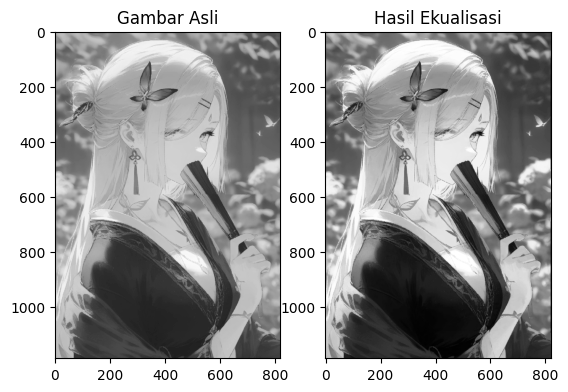

In [31]:
hasilEkualisasi = ekualisasi(gabungFix,Skala(kumulatif(probabilitas(gabungFix,nilaiMuncul(gabungFix)))))
plt.subplot(121)
plt.imshow(gabungFix, cmap="gray")
plt.title("Gambar Asli")

plt.subplot(122)  
plt.imshow(hasilEkualisasi, cmap="gray")
plt.title("Hasil Ekualisasi")


 Script dibawah ini merupakan fungsi histogramE yang digunakan untuk menampilkan histogram dari gambar dalam skala abu-abu (grayscale). Fungsi ini menerima gambar grayscale (arr) dan skala (skala, default 256 untuk gambar grayscale). Pertama, fungsi menghitung frekuensi kemunculan setiap nilai piksel dalam gambar menggunakan fungsi nilaiMuncul(arr). Kemudian, dibuat array idxGray yang berisi indeks nilai piksel dari 0 hingga skala-1. Selanjutnya, menggunakan Matplotlib, fungsi ini membuat plot histogram dengan plt.bar(idxGray, jmlGray), di mana idxGray digunakan sebagai sumbu x (nilai piksel) dan jmlGray sebagai sumbu y (frekuensi kemunculan). Plot ini memungkinkan untuk melihat distribusi intensitas piksel dalam gambar. selanjutnya ditampilkan histogram sebelum ekualisasi dan setelah ekualisasi.

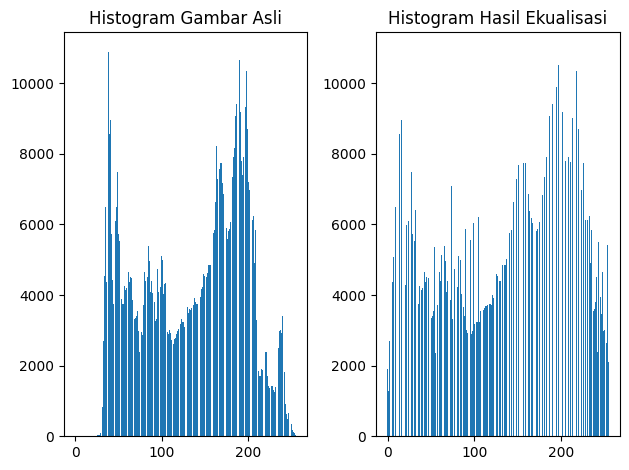

In [32]:
def histogramE(arr, skala=256):
    jmlGray = nilaiMuncul(arr)
    idxGray = [i for i in range (skala)]
    plt.bar(idxGray, jmlGray)


plt.subplot(121) 
histogramE(gabungFix)
plt.title("Histogram Gambar Asli")

plt.subplot(122)
histogramE(hasilEkualisasi)
plt.title("Histogram Hasil Ekualisasi")

plt.tight_layout() 
plt.show()

## Nomor 3

In [33]:
def grayScale(img):
    height, width, _ = img.shape
    kernel = np.ones((3, 3)) / 9
    filtered = cv.filter2D(img, -1, kernel)
    gray = np.round(filtered[:, :, 2] / 3 + filtered[:, :, 1] / 3 + filtered[:, :, 0] / 3).astype(np.uint8)
    return gray

Script diatas merupakan fungsi grayScale(img) adalah sebuah fungsi yang mengubah gambar berwarna menjadi gambar skala abu-abu (grayscale). Pertama, fungsi ini mengambil gambar (img) dan mendapatkan dimensi tinggi dan lebar gambar tersebut. Selanjutnya, sebuah kernel rata-rata 3x3 (kernel = np.ones((3, 3)) / 9) digunakan untuk meratakan gambar, yang diterapkan pada gambar asli menggunakan cv.filter2D(img, -1, kernel). Hasilnya adalah gambar yang telah diratakan, kemudian nilai intensitas pikselnya dihitung dengan menggunakan rata-rata dari saluran warna biru (filtered[:, :, 2]), hijau (filtered[:, :, 1]), dan merah (filtered[:, :, 0]) di setiap piksel. Operasi ini menghasilkan gambar grayscale di mana setiap piksel memiliki intensitas yang merupakan rata-rata dari saluran warna RGB awalnya. Hasil akhirnya dibulatkan dan dikonversi menjadi tipe data np.uint8 sebelum dikembalikan sebagai gambar skala abu-abu.

Script dibawah ini merupakan gambar "kurumi.jpg" Selanjutnya program akan menampilkan gambar yang masih berwarna RGB dan menampilkan hasil gambar yang telah di ubah ke gray.

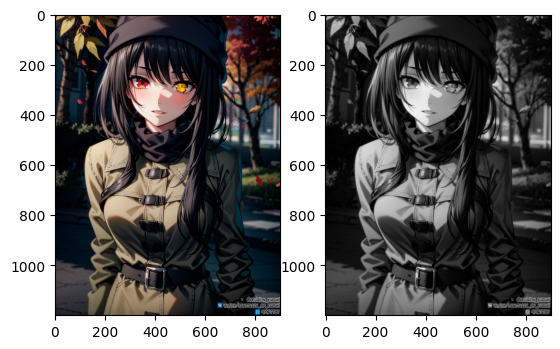

In [34]:
plt.subplot(121)
kurumi = plt.imread('kurumi.jpg')
plt.imshow(kurumi,cmap="gray")

plt.subplot(122)
grayKurumi = grayScale(kurumi)
plt.imshow(grayKurumi,cmap="gray")

Script dibawah isi merupakan gambar "megumin.jpg" Selanjutnya program akan menampilkan gambar yang masih berwarna RGB dan menampilkan hasil gambar yang telah di ubah ke gray.

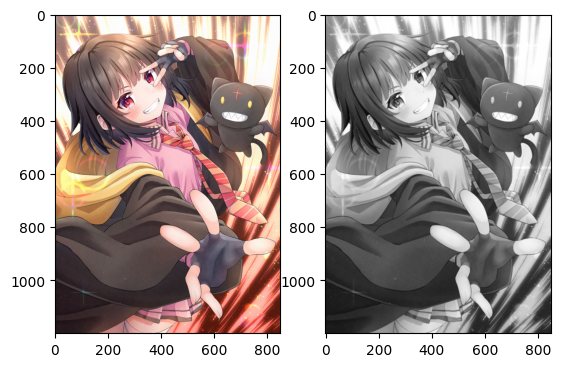

In [35]:
plt.subplot(121)
megumin = plt.imread('megumin.jpg')
plt.imshow(megumin,cmap="gray")

plt.subplot(122)
grayMegumin = grayScale(megumin)
plt.imshow(grayMegumin,cmap="gray")

In [36]:
def skalaTerdekat(sumber, tujuan):
    min = abs(sumber - tujuan[0])
    pikselMin = 0
    for i in range(len(tujuan)):
        cek = abs(sumber - tujuan[i])
        if(min > cek):
            min = cek
            pikselMin = i
    return pikselMin 

def newNilai(sumber, target, px = 256):
    result = np.zeros(px, dtype=int) 
    for i in range(px):
        result[i] = skalaTerdekat(sumber[i], target)
    return result

def spesifikasi(sumber, target,px=256):
    nilaiAsal = Skala(kumulatif(probabilitas(sumber,nilaiMuncul(sumber))))
    nilaiTujuan = Skala(kumulatif(probabilitas(target,nilaiMuncul(target))))
    newValue = newNilai(nilaiAsal,nilaiTujuan)
    return ekualisasi(sumber,newValue)

Script diatas terdapat fungsi skalaTerdekat(sumber, tujuan) untukmencari nilai piksel terdekat dari satu nilai sumber ke dalam daftar nilai target. Ini dilakukan dengan menghitung perbedaan absolut antara nilai sumber dan setiap nilai dalam daftar target, lalu memilih nilai yang paling mendekati. Hasilnya adalah indeks dari nilai piksel terdekat di dalam daftar target. selanjutnya fungsi newNilai(sumber, target, px=256): untuk membuat pemetaan baru dari nilai piksel dari gambar sumber ke gambar target. Dengan menggunakan fungsi skalaTerdekat, setiap nilai piksel dalam gambar sumber diubah menjadi nilai piksel yang paling mendekati dalam gambar target. Hasilnya adalah array baru yang merupakan pemetaan nilai piksel baru. Kemudian fungsi spesifikasi(sumber, target, px=256) untuk proses spesifikasi histogram, mengambil gambar sumber dan gambar target sebagai input. Pertama, fungsi menghitung distribusi intensitas piksel dari kedua gambar dengan menghitung nilai kumulatif dan probabilitas. Selanjutnya, menggunakan fungsi newNilai untuk membuat pemetaan nilai piksel baru dari gambar sumber ke gambar target. Terakhir, proses ekualisasi histogram diterapkan pada gambar sumber dengan menggunakan pemetaan nilai piksel baru ini, menghasilkan gambar sumber yang distribusi histogramnya disesuaikan dengan gambar target.

Script dibawh ini merupakan script untuk menampilkan gambar hasil spesifikasi. yang akan ditampilkan terdapat dua gambar. yang pertama gambar senheToKurumi yang merupakan hasil spesifikasi dengan menargetkan dar gambar grayKurumi dan gambar keduan yaitu senheToMegumin yang merupakan hasil spesifikasi dengan menargetkan dari gambar grayMegumin.

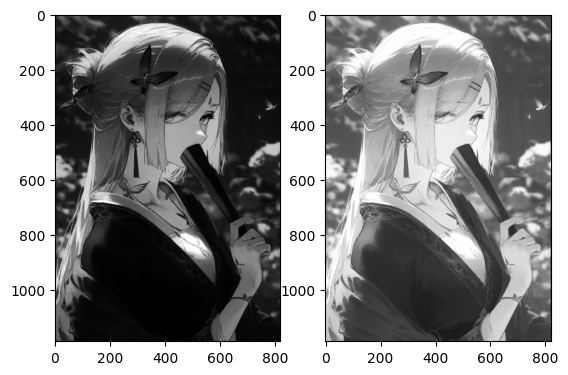

In [37]:
plt.subplot(121)
senheToKurumi = spesifikasi(hasilEkualisasi,grayKurumi)
plt.imshow(senheToKurumi, cmap="gray")

plt.subplot(122)
senheToMegumin = spesifikasi(hasilEkualisasi,grayMegumin)
plt.imshow(senheToMegumin, cmap="gray")